________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


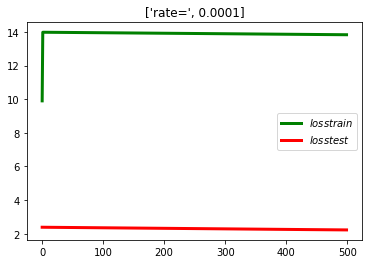

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\australian.txt")
    return data[0], data[1]

X, y = get_data()
X = X.todense()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

from numpy import *
w = mat(random.rand(14, 1))
b = np.random.normal()

c = 0.02
def loss(x,y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    ww = w.T*w/2
    hnum = len(x)
    k1 = mat(ones((hnum, 1)))
    xx = hstack((x, k1))
    t1 = xx*w1
    t2 = t1
    for i in range(hnum):
        t1[i, 0] = 1-y[i]*t1[i, 0]
    for i in range(hnum):
        t2[i, 0] = max(0, t1[i, 0])
    ww2 = 0
    for i in range(hnum):
        ww2 += t2[i, 0]
    return ww+c*ww2

def gw(x,y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    hnum = len(x)
    k1 = mat(ones((hnum, 1)))
    xx = hstack((x, k1))
    t1 = xx * w1
    x1 = x
    x2 = x
    for i in range(hnum):
        t1[i, 0] = 1 - y[i] * t1[i, 0]
        if t1[i, 0] >= 0:
            x1[i] = -y[i]*x[i]
        else:
            x1[i] = 0
    x2[0] = 0
    for i in range(hnum):
        x2[0] += x1[i]
    return x2[0]

def gb(x, y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    hnum = len(x)
    k1 = mat(ones((hnum, 1)))
    xx = hstack((x, k1))
    t1 = xx * w1
    y1 = y
    for i in range(hnum):
        t1[i, 0] = 1 - y[i] * t1[i, 0]
        if t1[i, 0] >= 0:
            y1[i] = -y[i]
        else:
            y1[i] = 0
    y2 = 0
    for i in range(hnum):
        y2 += y1[i]
    return y2


def gradient_w(x, y):

    return w.T+c*gw(x, y)


def gradient_b(x, y):

    return c*gb(x, y)


rate = 0.0001
listx = []
listy = []
listz = []

for i in range(500):
    w_t = w.T
    w_t = w_t-rate*gradient_w(X_train, y_train)
    b = b-rate*gradient_b(X_train, y_train)
    w = w_t.T
    listx.append(i)
    loss_train = loss(X_train, y_train)

    listy.append(loss_train[0, 0])
    loss_test = loss(X_test, y_test)

    listz.append(loss_test[0, 0])

plt.figure('model')
plt.plot(listx, listy, label="$losstrain$", color="green", linewidth=3)
plt.plot(listx, listz, label="$losstest$", color="red", linewidth=3)
plt.title(["rate=", rate])
plt.legend()
plt.show()
